機械学習（ニューラルネットワーク）によりアヤメの花の分類を行うプログラム

アヤメのデータセットは学習モデルに入力する特徴量と判定結果となる出力の関係がシンプルなため，機械学習のしくみを理解する際によく用いられる

データは米国カリフォルニア大学のデータベース [machine learning repository](https://archive.ics.uci.edu/ml/index.php)よりダウンロード可能

最初にプログラムを動かすために必要なライブラリの読み込みを行います

In [ ]:
from sklearn import datasets # データセット
from sklearn.neural_network import MLPClassifier # ニューラルネットワーク（分類用）
import numpy as np # 配列演算
import matplotlib.pyplot as plt # グラフ描画
from matplotlib.colors import ListedColormap

このプログラムでは，特徴量（がく片の長さと幅）で2クラス（セトサとヴァーシカラー）へ分類を行います

Now Learning...
Iteration 1, loss = 0.60995140
Iteration 2, loss = 0.60810787
Iteration 3, loss = 0.60626766
Iteration 4, loss = 0.60443067
Iteration 5, loss = 0.60259692
Iteration 6, loss = 0.60076005
Iteration 7, loss = 0.59888353
Iteration 8, loss = 0.59700900
Iteration 9, loss = 0.59513699
Iteration 10, loss = 0.59326786
Iteration 11, loss = 0.59140188
Iteration 12, loss = 0.58953927
Iteration 13, loss = 0.58768019
Iteration 14, loss = 0.58582481
Iteration 15, loss = 0.58397325
Iteration 16, loss = 0.58212563
Iteration 17, loss = 0.58028203
Iteration 18, loss = 0.57844257
Iteration 19, loss = 0.57660731
Iteration 20, loss = 0.57479837
Iteration 21, loss = 0.57300824
Iteration 22, loss = 0.57122452
Iteration 23, loss = 0.56944701
Iteration 24, loss = 0.56767553
Iteration 25, loss = 0.56592439
Iteration 26, loss = 0.56420044
Iteration 27, loss = 0.56248421
Iteration 28, loss = 0.56077539
Iteration 29, loss = 0.55907368
Iteration 30, loss = 0.55738048
Iteration 31, loss = 0.55576229
I

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


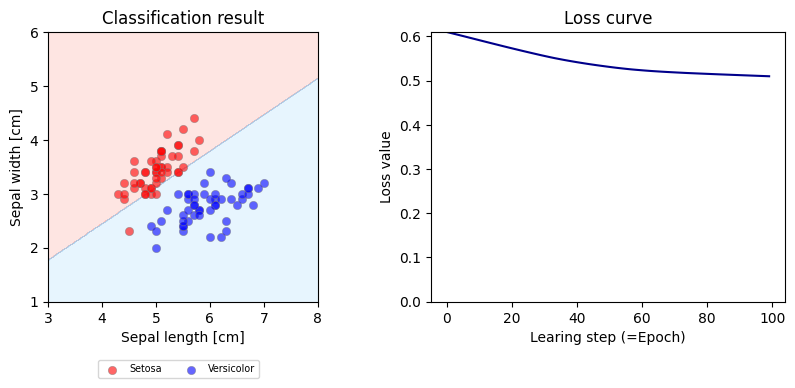

In [ ]:
#　アヤメの分類（2つの特徴量で2クラスに分類）
# 特徴量：がく片の長さと幅
# クラス：セトサ，ヴァーシカラー

# 学習回数の設定
epochs = 10


# アヤメのデータを読み込み、変数irisに格納
iris = datasets.load_iris()
# 特徴量のセットを変数Xに、ターゲットを変数yに格納
X = iris.data
y = iris.target

# 特徴量をがく片の長さ(sepal length)と幅(sepal width)の
# 2個だけ抽出（0列目と1列目のみ残す）
X = X[:,:2]
# アイリス　セトサ(0)とヴァーシカラー(1)の2クラスデータのみ残す
X=X[y!=2]
y=y[y!=2]


# 分類器：多層ニューラルネットワーク
# hidden_layer_sizes : 中間層数、各中間層ニューロン数
# max_iter : 学習回数上限
# tol : 損失関数の値の変化が10回tol値以下で学習終了
# random_state : 重みの初期値 (１＝ランダム初期値固定、None = ランダム初期値変化）
clf = MLPClassifier(hidden_layer_sizes=(4, ), max_iter=epochs, tol=0, random_state=1, verbose=1)

# ニューラルネットワークの学習
print('Now Learning...')
clf.fit(X, y)


# 分類精度を計算
# 学習データに対する分類結果を取得
result = clf.predict(X)

print('ターゲット（正解）')
print(y)
print('ニューラルネットワークの判定')
print(result)

# データ数をtotalに格納
# len : 配列の長さ取得（2次元配列に対しては行数取得）
total = len(X)
# ターゲット（正解）と予測が一致した数をsuccessに格納
success = sum(result==y)

# 正解率をパーセント表示
print('Accuracy [%]')
print('{:.2f}'.format(100.0*success/total))


# 分類結果を表示（背景色で分割）

# がく片の長さ(sepal length)と幅(sepal width)の
# 最小値-1と最大値+1
#x_min = (min(X[:,0]) - 1)
#x_max = (max(X[:,0]) + 1)
#y_min = (min(X[:,1]) - 1)
#y_max = (max(X[:,1]) + 1)

# fixed area
x_min = 3
x_max = 8
y_min = 1
y_max = 6


# グラフ表示エリアを縦横400ずつのグリッドに分割
# (分類クラスに応じて各グリッドの背景に色を塗るため)
# ステップ値にjを付け加えることで個数を指定（x_minからx_maxを400点で分割、x_maxを含む）
X_grid, Y_grid = np.mgrid[x_min:x_max:400j, y_min:y_max:400j]

# グリッドの点をscikit-learn用の入力に並べなおす
# ravel : １次元配列へ変換（行順に結合）
# np.c_ : 配列の結合 2個の行ベクトルを転置して列方向に並べる
XY_grid = np.c_[X_grid.ravel(), Y_grid.ravel()]

# 各グリッドの点が属するクラスをZに格納
Z = clf.predict(XY_grid)

# グリッド上に並べなおす
# reshape : 1次元配列を2次元配列へ変換
# shape : 配列の大きさを取得
Z = Z.reshape(X_grid.shape)

# クラス0 (iris setosa)  : Red
# クラス1 (iris versicolor)  : Blue
# クラス2 (iris virginica)  : Green
cmap = ListedColormap(('salmon', 'lightskyblue'))

# グラフウインドウ全体の大きさ(縦方向に1枚、横方向に2枚のグラフ表示領域を確保)
fig, axs = plt.subplots(1, 2, figsize=(8.5,4.0), squeeze=False)
# Graph title
axs[0,0].set_title('Classification result')
# 背景の色をクラス領域毎に塗りつぶし
axs[0,0].contourf(X_grid, Y_grid, Z, alpha=0.2, cmap=cmap)
# 軸ラベルを設定
axs[0,0].set_xlabel('Sepal length [cm]')
axs[0,0].set_ylabel('Sepal width [cm]')
# aspect
axs[0,0].set_aspect('equal','box')


# ターゲットを表示(クラスで色分け）
# iris setosa (y=0) のデータのみを取り出す
Xc0 = X[y==0]
# iris versicolor (y=1) のデータのみを取り出す
Xc1 = X[y==1]

# iris setosa のデータXc0をプロット
axs[0,0].scatter(Xc0[:,0], Xc0[:,1], c='red', linewidths=0.5, edgecolors='gray', alpha=0.6, label='Setosa')
# iris versicolor のデータXc1をプロット
axs[0,0].scatter(Xc1[:,0], Xc1[:,1], c='blue', linewidths=0.5, edgecolors='gray', alpha=0.6, label='Versicolor')
# legend
axs[0,0].legend(bbox_to_anchor=(0.8,-0.2), ncol=2, fontsize='x-small')


# 2枚目のグラフを設定
# 損失関数の時間変化を描画
axs[0,1].plot(clf.loss_curve_, color='darkblue')
# 損失関数のグラフのtitle, 軸ラベルを設定
axs[0,1].set_title('Loss curve')
axs[0,1].set_xlabel('Learing step (=Epoch)')
axs[0,1].set_ylabel('Loss value')
# グラフ縦軸の範囲　最小値0、最大値をloss_curve_の最大値とする
axs[0,1].set_ylim(0, max(clf.loss_curve_))

# グラフを表示
plt.tight_layout()
plt.show()
